In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [3]:
train = pd.read_csv('data_housing_model/train_housing_prepared')
test = pd.read_csv('data_housing_model/test_housing_prepared')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [4]:
train_scaled = pd.read_csv('data_housing_model/train_scaled_housing_prepared')
test_scaled = pd.read_csv('data_housing_model/test_scaled_housing_prepared')
train_scaled.drop('Id', axis=1, inplace=True)
test_scaled.drop('Id', axis=1, inplace=True)

In [5]:
y = pd.read_csv('data_housing_model/housing_y')
y.drop('Id', axis=1, inplace=True)

In [6]:
clf = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid={'n_neighbors': np.arange(1, 11)},
    scoring='r2',
    cv=5,
)

# Модель на исходных данных

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [8]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2')

In [9]:
model = clf.best_estimator_

Train:	R2 = 0.802	MAE = 24748
Test:	R2 = 0.617	MAE = 34396


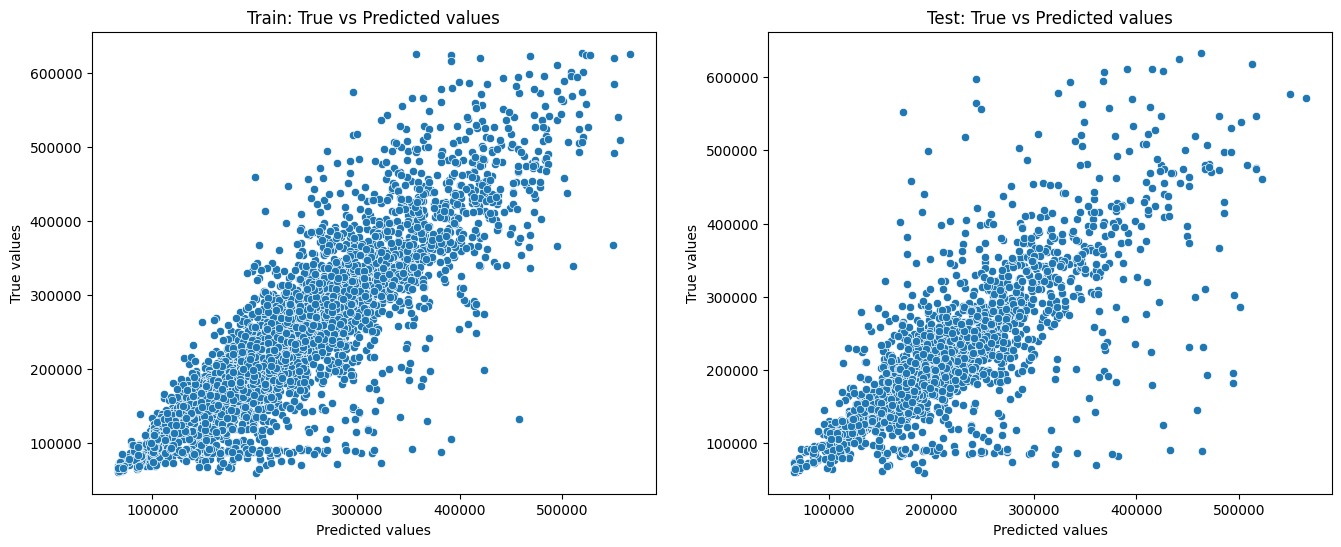

In [10]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(pd.Series(y_train['Price']), y_train_preds.flatten(), pd.Series(y_test['Price']), y_test_preds.flatten())

In [11]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(model, train, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 К-ближайший соседей = ', round(scores.mean(), 4))

R2 К-ближайший соседей =  0.6487


# Модель на масштабированных данных

In [12]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(train_scaled, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=42)

In [13]:
clf.fit(X_train_m, y_train_m)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2')

In [14]:
model_m = clf.best_estimator_

Train:	R2 = 0.746	MAE = 28998
Test:	R2 = 0.639	MAE = 34699


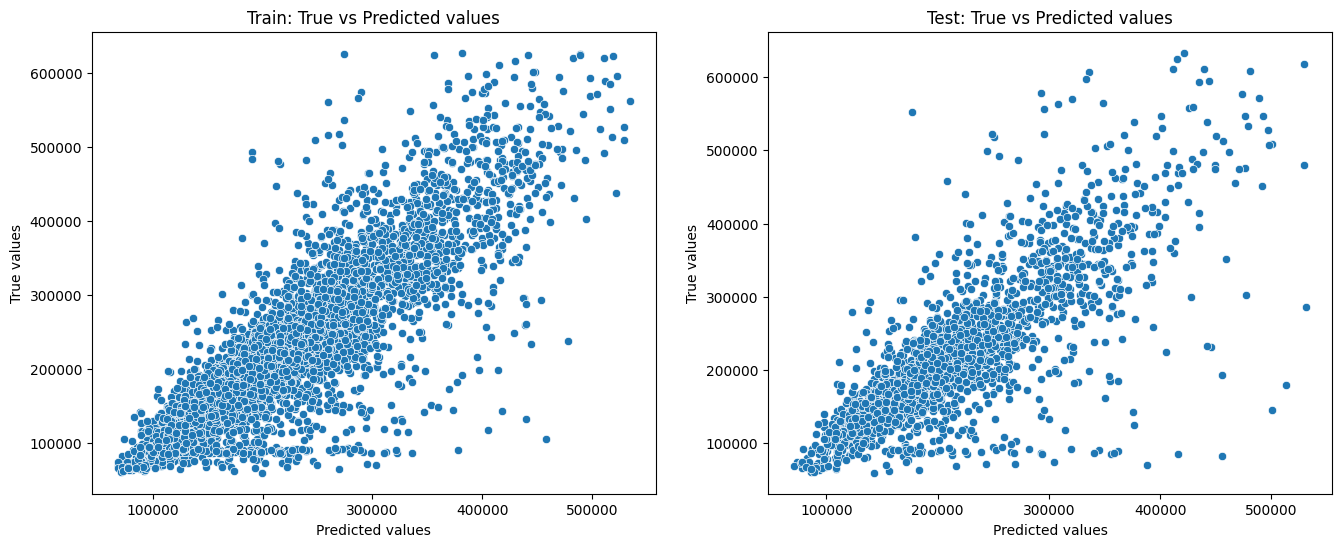

In [15]:
y_train_preds = model_m.predict(X_train_m)
y_test_preds = model_m.predict(X_test_m)

evaluate_preds(pd.Series(y_train_m['Price']), y_train_preds.flatten(), pd.Series(y_test_m['Price']), y_test_preds.flatten())

In [16]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(model_m, train_scaled, y['Price'], cv=cv, scoring='r2', n_jobs=-1)
print('R2 К-ближайший соседей масштабированных = ', round(scores.mean(), 4))

R2 К-ближайший соседей масштабированных =  0.6626
